In [1]:
from model import Transformer
from config import Config
from tokenizer import Tokenizer
import torch as t
import warnings
import json
from helpers import take_metrics, extract_answer_from_prediction

warnings.filterwarnings("ignore")

In [2]:
dir_path = "saved_runs/variable_digit_add_30"

# read the config file
config_dict = json.load(open(f"{dir_path}/config.json"))
config = Config(**config_dict)
config

Config(lr=0.001, weight_decay=1.0, batch_size=256, p=100, d_model=128, fn_name='add', frac_train=0.3, num_epochs=3000, save_models=True, save_every=5, fixed_digit=False, n_warmup=10, stopping_thresh=-1, seed=0, num_layers=1, batch_style='full', d_vocab=14, num_digits=3, n_ctx=12, d_mlp=512, num_heads=4, act_type='ReLU', device=device(type='cuda'), use_ln=False, take_metrics_every_n_epochs=10)

In [3]:
def get_intermediate_model_paths(dir_path, beginning, end, num_models):
    '''
    if the granularity doesn't work function will simply fail when you try to load the models
    call this responsibly :)
    '''
    intervals = t.linspace(beginning, end, num_models+1).int()[1:-1].tolist()
    return intervals, [dir_path + f'/models/{num}.pth' for num in intervals] 

In [10]:
total_epochs = 3000
mid_points = [0, 10, 100, 300, 3000]
model_numbers = [2, 18, 10, 5]

assert len(mid_points) == len(model_numbers) + 1

model_paths = [dir_path + '/init.pth']
indices = [0]

for i in range(len(model_numbers)):
    new_indices, new_model_paths = get_intermediate_model_paths(dir_path, mid_points[i], mid_points[i+1], model_numbers[i])
    indices += new_indices
    model_paths += new_model_paths
    if mid_points[i+1] != total_epochs:
        indices.append(mid_points[i+1])
        model_paths.append(dir_path + f'/models/{mid_points[i+1]}.pth')

indices.append(total_epochs)
model_paths.append(dir_path + f'/final.pth')

print(indices)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 840, 1380, 1920, 2460, 3000]


In [11]:
all_metrics = []

for i in range(len(model_paths)):
    print(f"Taking metrics for model {indices[i]}:")
    metrics = take_metrics(model_paths[i], dir_path)
    print(metrics)
    print()
    all_metrics.append(metrics)


Taking metrics for model 0:
{'train_total_accuracy': 0.0, 'test_total_accuracy': 0.0}

Taking metrics for model 5:
{'train_total_accuracy': 0.0006557377049180328, 'test_total_accuracy': 0.0005755395683453237, 'train_digit_0_accuracy': 0.09901639344262295, 'train_digit_1_accuracy': 0.0934486198869305, 'train_digit_2_accuracy': 0.09054325955734406, 'test_digit_0_accuracy': 0.10503597122302158, 'test_digit_1_accuracy': 0.08777745748054194, 'test_digit_2_accuracy': 0.10320901994796183}

Taking metrics for model 10:
{'train_total_accuracy': 0.01377049180327869, 'test_total_accuracy': 0.007194244604316547, 'train_digit_0_accuracy': 0.11147540983606558, 'train_digit_1_accuracy': 0.15563684735616895, 'train_digit_2_accuracy': 0.4842387659289068, 'test_digit_0_accuracy': 0.1097841726618705, 'test_digit_1_accuracy': 0.14932257134620927, 'test_digit_2_accuracy': 0.4663197455912113}

Taking metrics for model 15:
{'train_total_accuracy': 0.12229508196721312, 'test_total_accuracy': 0.079136690647482

In [15]:
test_digit_keys = [key for key in all_metrics[-1].keys() if 'test_digit' in key]
test_digit_keys

['test_digit_0_accuracy', 'test_digit_1_accuracy', 'test_digit_2_accuracy']

In [18]:
N_digit = 3
test_digit_accuracy = dict()
for i in range(N_digit):
    k = f'test_digit_{i}_accuracy'
    test_digit_accuracy[i] = [metrics.get(k, 0.0) for metrics in all_metrics]



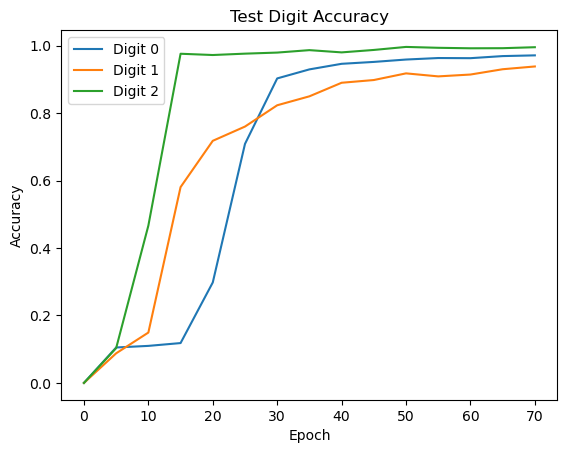

In [23]:
# plot each key in test digit accuracy with indices

import matplotlib.pyplot as plt

plot_first = 15

for i in range(N_digit):
    plt.plot(indices[:plot_first], test_digit_accuracy[i][:plot_first], label=f"Digit {i}")

plt.legend()
plt.title("Test Digit Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()
